# Image Classifier Model

In [16]:
import os
import shutil
import pandas as pd
import matplotlib.pyplot as plt
from ultralytics import YOLO
from PIL import Image
from IPython.display import display, Image as IPyImage

# Set matplotlib to display inline
%matplotlib inline

In [17]:
# Define paths
DATA_YAML_PATH = 'data.yaml' 
TEST_IMAGES_DIR = 'datasets/my_mini_dataset/test/images'    

# Load the model (nano version recommended for CPU speed)
model = YOLO('yolov8n.pt')

In [18]:
# Train the model
# We use device='cpu' and a lower batch size to prevent memory issues
results = model.train(
    data=DATA_YAML_PATH,
    epochs=10,       # Adjust epochs as needed
    imgsz=640,
    batch=4,         # Keep low for CPU
    device='cpu',    # Force CPU
    plots=True,       # Save plots automatically

    name='my_custom_model', # Fixed folder name
    exist_ok=True
)

Ultralytics 8.3.240 🚀 Python-3.10.12 torch-2.9.1+cu128 CPU (AMD Ryzen 5 5600H with Radeon Graphics)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=my_custom_model, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, p

In [19]:
source_path = 'runs/detect/my_custom_model/weights/best.pt'
destination_path = 'my_final_model.pt'

if os.path.exists(source_path):
    shutil.copy(source_path, destination_path)
    print(f"Success! Best weights copied to root as '{destination_path}'")
else:
    print("Warning: Could not find weights file to copy.")

Success! Best weights copied to root as 'my_final_model.pt'


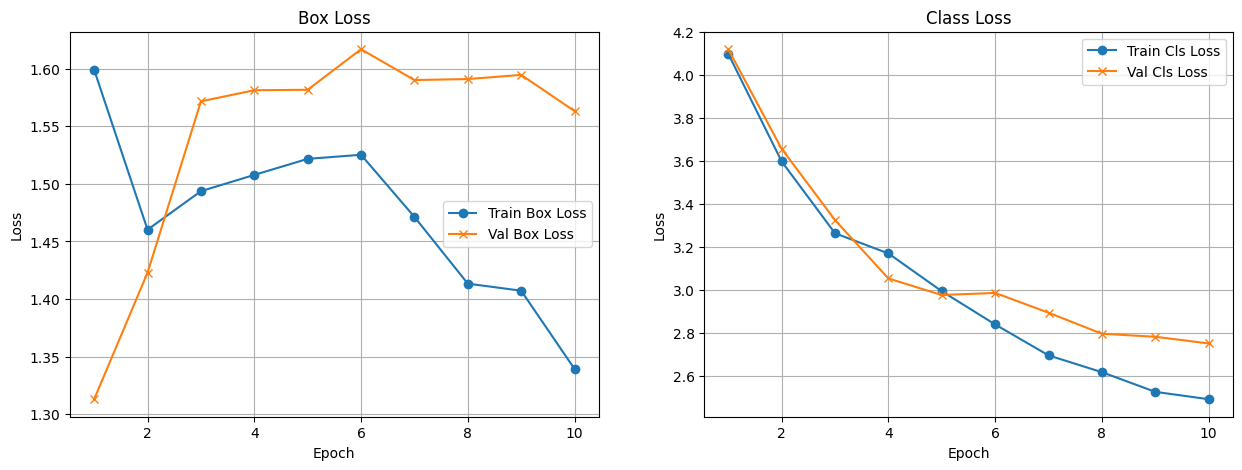

In [20]:
# YOLO saves training metrics to a results.csv file in the run directory
results_path = f'{model.trainer.save_dir}/results.csv'

# Read the CSV
df = pd.read_csv(results_path)
df.columns = df.columns.str.strip()  # Clean whitespace

# Create subplots for Box Loss and Class Loss
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Box Loss
ax[0].plot(df['epoch'], df['train/box_loss'], label='Train Box Loss', marker='o')
ax[0].plot(df['epoch'], df['val/box_loss'], label='Val Box Loss', marker='x')
ax[0].set_title('Box Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[0].grid(True)

# Class Loss
ax[1].plot(df['epoch'], df['train/cls_loss'], label='Train Cls Loss', marker='o')
ax[1].plot(df['epoch'], df['val/cls_loss'], label='Val Cls Loss', marker='x')
ax[1].set_title('Class Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend()
ax[1].grid(True)

plt.show()